In [2]:
import pandas as pd
import numpy as np

# ساخت دیتافریم فروش روزانه
data = {
    'تاریخ': pd.date_range('2024-01-01', periods=10),
    'فروش': [100, 150, 200, 180, 250, 300, 280, 350, 400, 450],
    'محصول': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'فروشنده': ['علی', 'رضا', 'علی', 'رضا', 'علی', 'رضا', 'علی', 'رضا', 'علی', 'رضا']
}

df = pd.DataFrame(data)
print("📊 دیتافریم فروش روزانه:")
df

📊 دیتافریم فروش روزانه:


,تاریخ,فروش,محصول,فروشنده
0,2024-01-01,100,A,علی
1,2024-01-02,150,B,رضا
2,2024-01-03,200,A,علی
3,2024-01-04,180,B,رضا
4,2024-01-05,250,A,علی
5,2024-01-06,300,B,رضا
6,2024-01-07,280,A,علی
7,2024-01-08,350,B,رضا
8,2024-01-09,400,A,علی
9,2024-01-10,450,B,رضا


In [3]:
# استفاده از shift
df['فروش_روز_قبل'] = df['فروش'].shift(1)  # یک روز به عقب
df['فروش_روز_بعد'] = df['فروش'].shift(-1) # یک روز به جلو
df['تغییرات_فروش'] = df['فروش'] - df['فروش_روز_قبل']

print("📈 بعد از اعمال shift:")
df[['تاریخ', 'فروش', 'فروش_روز_قبل', 'تغییرات_فروش','فروش_روز_بعد']]

📈 بعد از اعمال shift:


,تاریخ,فروش,فروش_روز_قبل,تغییرات_فروش,فروش_روز_بعد
0,2024-01-01,100,NaN,NaN,150.0
1,2024-01-02,150,100.0,50.0,200.0
2,2024-01-03,200,150.0,50.0,180.0
3,2024-01-04,180,200.0,-20.0,250.0
4,2024-01-05,250,180.0,70.0,300.0
5,2024-01-06,300,250.0,50.0,280.0
6,2024-01-07,280,300.0,-20.0,350.0
7,2024-01-08,350,280.0,70.0,400.0
8,2024-01-09,400,350.0,50.0,450.0
9,2024-01-10,450,400.0,50.0,NaN


In [4]:
# رتبه‌بندی فروش
df['رتبه_فروش'] = df['فروش'].rank(method='dense', ascending=False)
df['رتبه_تاریخ'] = df['تاریخ'].rank(method='dense')

print("🏆 بعد از اعمال rank:")
df[['تاریخ', 'فروش', 'رتبه_فروش', 'رتبه_تاریخ']]

🏆 بعد از اعمال rank:


,تاریخ,فروش,رتبه_فروش,رتبه_تاریخ
0,2024-01-01,100,10.0,1.0
1,2024-01-02,150,9.0,2.0
2,2024-01-03,200,7.0,3.0
3,2024-01-04,180,8.0,4.0
4,2024-01-05,250,6.0,5.0
5,2024-01-06,300,4.0,6.0
6,2024-01-07,280,5.0,7.0
7,2024-01-08,350,3.0,8.0
8,2024-01-09,400,2.0,9.0
9,2024-01-10,450,1.0,10.0


In [5]:
# میانگین متحرک ۳ روزه
df['میانگین_متحرک_۳روزه'] = df['فروش'].rolling(window=3).mean()
# مجموع متحرک ۲ روزه
df['مجموع_متحرک_۲روزه'] = df['فروش'].rolling(window=2).sum()
print("📊 بعد از اعمال rolling:")
df[['تاریخ', 'فروش', 'میانگین_متحرک_۳روزه', 'مجموع_متحرک_۲روزه']]

📊 بعد از اعمال rolling:


,تاریخ,فروش,میانگین_متحرک_۳روزه,مجموع_متحرک_۲روزه
0,2024-01-01,100,NaN,NaN
1,2024-01-02,150,NaN,250.0
2,2024-01-03,200,150.000000,350.0
3,2024-01-04,180,176.666667,380.0
4,2024-01-05,250,210.000000,430.0
5,2024-01-06,300,243.333333,550.0
6,2024-01-07,280,276.666667,580.0
7,2024-01-08,350,310.000000,630.0
8,2024-01-09,400,343.333333,750.0
9,2024-01-10,450,400.000000,850.0


In [6]:
# مجموع تجمعی فروش
df['فروش_تجمعی'] = df['فروش'].cumsum()
# مجموع تجمعی به تفکیک محصول
df['فروش_تجمعی_محصول'] = df.groupby('محصول')['فروش'].cumsum()

print("📈 بعد از اعمال cumsum:")
df[['تاریخ', 'محصول', 'فروش', 'فروش_تجمعی', 'فروش_تجمعی_محصول']]

📈 بعد از اعمال cumsum:


,تاریخ,محصول,فروش,فروش_تجمعی,فروش_تجمعی_محصول
0,2024-01-01,A,100,100,100
1,2024-01-02,B,150,250,150
2,2024-01-03,A,200,450,300
3,2024-01-04,B,180,630,330
4,2024-01-05,A,250,880,550
5,2024-01-06,B,300,1180,630
6,2024-01-07,A,280,1460,830
7,2024-01-08,B,350,1810,980
8,2024-01-09,A,400,2210,1230
9,2024-01-10,B,450,2660,1430


In [7]:
print("🎯 نتایج نهایی همه توابع:")
result_df = df[
    [
        "تاریخ",
        "فروش",
        "فروش_روز_قبل",
        "فروش_روز_بعد",
        "تغییرات_فروش",
        "رتبه_فروش",
        "رتبه_تاریخ",
        "میانگین_متحرک_۳روزه",
        "مجموع_متحرک_۲روزه",
        "فروش_تجمعی",
        "فروش_تجمعی_محصول",
    ]
]
result_df

🎯 نتایج نهایی همه توابع:


,تاریخ,فروش,فروش_روز_قبل,فروش_روز_بعد,تغییرات_فروش,رتبه_فروش,رتبه_تاریخ,میانگین_متحرک_۳روزه,مجموع_متحرک_۲روزه,فروش_تجمعی,فروش_تجمعی_محصول
0,2024-01-01,100,NaN,150.0,NaN,10.0,1.0,NaN,NaN,100,100
1,2024-01-02,150,100.0,200.0,50.0,9.0,2.0,NaN,250.0,250,150
2,2024-01-03,200,150.0,180.0,50.0,7.0,3.0,150.000000,350.0,450,300
3,2024-01-04,180,200.0,250.0,-20.0,8.0,4.0,176.666667,380.0,630,330
4,2024-01-05,250,180.0,300.0,70.0,6.0,5.0,210.000000,430.0,880,550
5,2024-01-06,300,250.0,280.0,50.0,4.0,6.0,243.333333,550.0,1180,630
6,2024-01-07,280,300.0,350.0,-20.0,5.0,7.0,276.666667,580.0,1460,830
7,2024-01-08,350,280.0,400.0,70.0,3.0,8.0,310.000000,630.0,1810,980
8,2024-01-09,400,350.0,450.0,50.0,2.0,9.0,343.333333,750.0,2210,1230
9,2024-01-10,450,400.0,NaN,50.0,1.0,10.0,400.000000,850.0,2660,1430


In [8]:
df[["تاریخ", "محصول", "فروشنده", "فروش"]]

,تاریخ,محصول,فروشنده,فروش
0,2024-01-01,A,علی,100
1,2024-01-02,B,رضا,150
2,2024-01-03,A,علی,200
3,2024-01-04,B,رضا,180
4,2024-01-05,A,علی,250
5,2024-01-06,B,رضا,300
6,2024-01-07,A,علی,280
7,2024-01-08,B,رضا,350
8,2024-01-09,A,علی,400
9,2024-01-10,B,رضا,450


In [9]:
# سطح ۱: با استفاده از shift() تغییرات درصدی فروش رو حساب کن
df['pct_sales'] = (df['فروش'] - df['فروش'].shift(1)) / df['فروش'].shift(1) * 100
df[["تاریخ", "محصول", "فروشنده", "فروش" , 'pct_sales']]

,تاریخ,محصول,فروشنده,فروش,pct_sales
0,2024-01-01,A,علی,100,NaN
1,2024-01-02,B,رضا,150,50.000000
2,2024-01-03,A,علی,200,33.333333
3,2024-01-04,B,رضا,180,-10.000000
4,2024-01-05,A,علی,250,38.888889
5,2024-01-06,B,رضا,300,20.000000
6,2024-01-07,A,علی,280,-6.666667
7,2024-01-08,B,رضا,350,25.000000
8,2024-01-09,A,علی,400,14.285714
9,2024-01-10,B,رضا,450,12.500000


In [10]:
# سطح ۲: با استفاده از rank() رتبه فروش به تفکیک هر محصول رو بدست آور
df['sales_rank']=df.groupby('محصول')['فروش'].rank(method='dense',ascending=False)
df[["تاریخ", "محصول", "فروشنده", "فروش", 'sales_rank' ]]

,تاریخ,محصول,فروشنده,فروش,sales_rank
0,2024-01-01,A,علی,100,5.0
1,2024-01-02,B,رضا,150,5.0
2,2024-01-03,A,علی,200,4.0
3,2024-01-04,B,رضا,180,4.0
4,2024-01-05,A,علی,250,3.0
5,2024-01-06,B,رضا,300,3.0
6,2024-01-07,A,علی,280,2.0
7,2024-01-08,B,رضا,350,2.0
8,2024-01-09,A,علی,400,1.0
9,2024-01-10,B,رضا,450,1.0


In [11]:
# سطح ۳: با استفاده از rolling() بیشترین فروش در ۲ روز متوالی رو پیدا کن
df['most_sales_2days'] = df['فروش'].rolling(window=2).max()
df[["تاریخ", "محصول", "فروشنده", "فروش", 'most_sales_2days' ]]

,تاریخ,محصول,فروشنده,فروش,most_sales_2days
0,2024-01-01,A,علی,100,NaN
1,2024-01-02,B,رضا,150,150.0
2,2024-01-03,A,علی,200,200.0
3,2024-01-04,B,رضا,180,200.0
4,2024-01-05,A,علی,250,250.0
5,2024-01-06,B,رضا,300,300.0
6,2024-01-07,A,علی,280,300.0
7,2024-01-08,B,رضا,350,350.0
8,2024-01-09,A,علی,400,400.0
9,2024-01-10,B,رضا,450,450.0


In [12]:
# سطح ۴: با استفاده از cumsum() میانگین متحرک تجمعی رو محاسبه کن
# df['mean_moving_sum']=df['فروش'].cumsum().mean()
# df[["تاریخ", "محصول", "فروشنده", "فروش", 'mean_moving_sum' ]]
# **** جواب درست ... باید تا هرنقطه میانگین رو حساب میکردیم ****
df['cumulative_moving_avg'] = df['فروش'].cumsum() / (df.index + 1)
df[["تاریخ", "محصول", "فروشنده", "فروش", 'cumulative_moving_avg' ]]


,تاریخ,محصول,فروشنده,فروش,cumulative_moving_avg
0,2024-01-01,A,علی,100,100.000000
1,2024-01-02,B,رضا,150,125.000000
2,2024-01-03,A,علی,200,150.000000
3,2024-01-04,B,رضا,180,157.500000
4,2024-01-05,A,علی,250,176.000000
5,2024-01-06,B,رضا,300,196.666667
6,2024-01-07,A,علی,280,208.571429
7,2024-01-08,B,رضا,350,226.250000
8,2024-01-09,A,علی,400,245.555556
9,2024-01-10,B,رضا,450,266.000000


In [15]:
import pandas as pd
bios=pd.read_excel("C:/Users/LENOVO/Downloads/olympics-data.xlsx")
bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


In [32]:
# bios.groupby('name')['height_cm'].max()

bios['height_rank']=bios['height_cm'].rank(ascending=False)
# bios[['athlete_id','name','height_cm','height_rank']]
bios.sort_values(['height_cm'],ascending=False)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_rank
89070,89782,Yao Ming,1980-09-12,Xuhui District,Shanghai,CHN,People's Republic of China,226.0,141.0,NaN,1.0
5781,5804,Tommy Burleson,1952-02-24,Crossnore,North Carolina,USA,United States,223.0,102.0,NaN,2.5
6978,7013,Arvydas Sabonis,1964-12-19,Kaunas,Kaunas,LTU,Lithuania Soviet Union,223.0,122.0,NaN,2.5
89075,89787,Roberto Dueñas,1975-11-01,Madrid,Madrid,ESP,Spain,221.0,137.0,NaN,5.0
120266,122147,Zhang Zhaoxu,1987-11-18,Binzhou,Shandong,CHN,People's Republic of China,221.0,110.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
145490,149217,Sin Ye-Chan,1995-06-13,NaN,NaN,NaN,Republic of Korea,NaN,NaN,NaN,NaN
145491,149218,Matthew Wepke,1989-12-05,NaN,NaN,NaN,Jamaica,NaN,NaN,NaN,NaN
145492,149219,Carlos García-Ordóñez,1927-04-24,La Habana (Havana),Ciudad de La Habana,CUB,Cuba,NaN,NaN,2019-11-24,NaN
145493,149220,Landysh Falyakhova,1998-08-31,Dva Polya Artash,Respublika Tatarstan,RUS,ROC,NaN,NaN,NaN,NaN


In [1]:
import matplotlib.pyplot as plt

# برای نمایش در Jupyter
%matplotlib inline

# تنظیم سایز نمودار
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

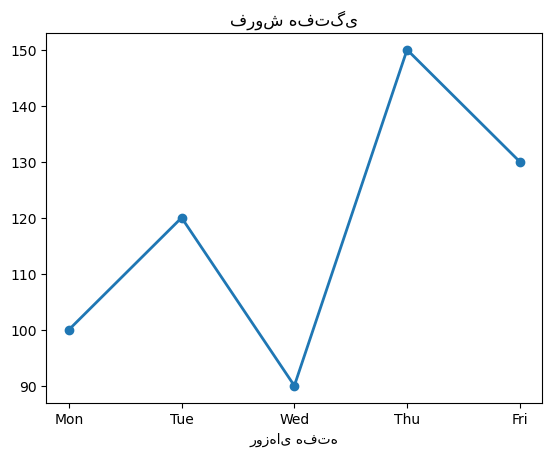

In [ ]:
# داده‌های نمونه
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
sales = [100, 120, 90, 150, 130]

plt.plot(days, sales, marker='o', linewidth=2, label='فروش روزانه')
plt.title('فروش هفتگی')
plt.xlabel('روزهای هفته')
plt.ylabel('تعداد فروش')
plt.legend()
plt.show()

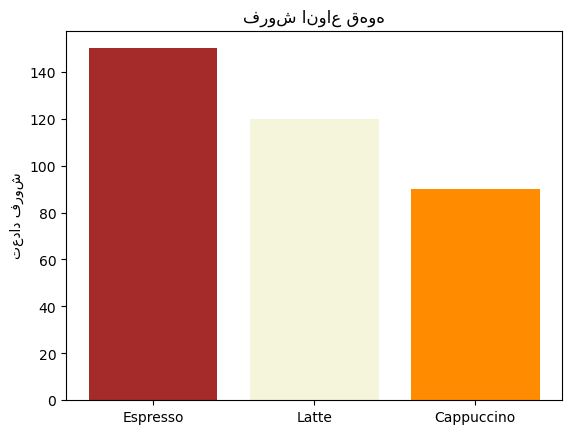

In [11]:
coffee_types = ['Espresso', 'Latte', 'Cappuccino']
units_sold = [150, 120, 90]

plt.bar(coffee_types, units_sold, color=['brown', 'beige', 'darkorange'])
plt.title('فروش انواع قهوه')
plt.ylabel('تعداد فروش')
plt.show()

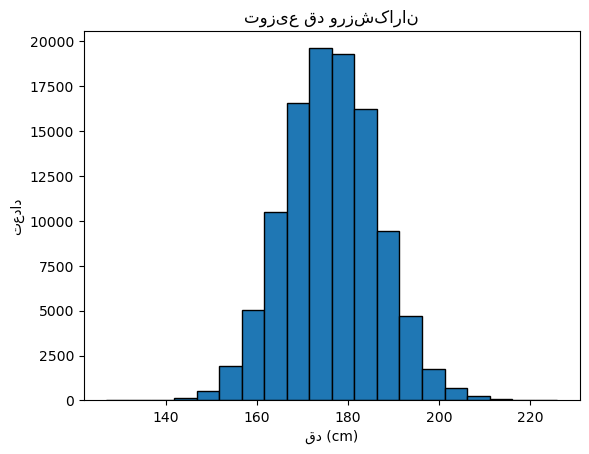

In [14]:
# توزیع قد ورزشکاران
import pandas as pd
bios=pd.read_excel("C:/Users/LENOVO/Downloads/olympics-data.xlsx")


plt.hist(bios['height_cm'], bins=20, edgecolor='black')
plt.title('توزیع قد ورزشکاران')
plt.xlabel('قد (cm)')
plt.ylabel('تعداد')
plt.show()